In [7]:
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import cv2

datadir = 'C:/Users/meher/Desktop/python/dataset/mini'
category = ['Dog','Cat']
for c in category :
    path=os.path.join(datadir,c)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break


<Figure size 640x480 with 1 Axes>

In [2]:
img_array

array([[117, 117, 119, ..., 133, 132, 132],
       [118, 117, 119, ..., 135, 134, 134],
       [119, 118, 120, ..., 137, 136, 136],
       ...,
       [ 79,  74,  73, ...,  80,  76,  73],
       [ 78,  72,  69, ...,  72,  73,  74],
       [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8)

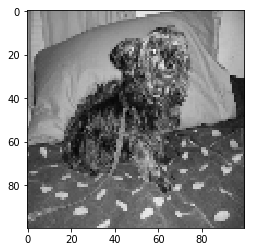

In [5]:
new_array=cv2.resize(img_array,(100,100))
plt.imshow(new_array,cmap='gray')
plt.show()

In [6]:
train_data=[]

def create_train_data ():
    for c in category :
        path=os.path.join(datadir,c)
        class_num=category.index(c) # 0 for dog , 1 for cat
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(50,50))
                train_data.append([new_array,class_num])
            except Exception :
                pass

In [7]:
create_train_data()

In [8]:
len (train_data)

5989

In [9]:
import random 
random.shuffle(train_data)

In [11]:
X =[]
y=[]
IMG_SIZE=100

In [12]:
for feature , label in train_data:
    X.append(feature)
    y.append(label)

X=np.array(X)  
y=np.array(y)

In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

<h1><b>the model</b></h1>

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation , Dense , Dropout, Flatten , Conv2D , MaxPooling2D , BatchNormalization
import pickle 


D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [41]:
X =pickle.load(open('X.pickle','rb'))
y=pickle.load(open('y.pickle','rb'))
X=X/255.0
X=X.reshape([-1,50, 50,1])
 
model=Sequential()


model.add(Conv2D(256, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy" , optimizer='adam' , metrics=['accuracy'])

model.fit(X,y,batch_size=16,epochs=1, validation_split=0.1)

Train on 5390 samples, validate on 599 samples
5390/5390 [==============================] - 198s 37ms/sample - loss: 0.6925 - acc: 0.5216 - val_loss: 0.7001 - val_acc: 0.5259


In [ ]:
model.fit(X,y,batch_size=16,epochs=1, validation_split=0.1)

In [42]:
model.save('my_model.h5')

In [4]:
model=load_model('my_model.h5')
#model.fit(X,y,batch_size=16,epochs=1, validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.


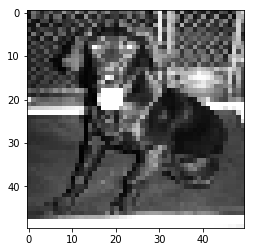

array([[[[ 53],
         [130],
         [ 97],
         ...,
         [ 87],
         [177],
         [216]],

        [[ 40],
         [118],
         [ 82],
         ...,
         [ 39],
         [185],
         [182]],

        [[102],
         [ 46],
         [ 36],
         ...,
         [104],
         [207],
         [156]],

        ...,

        [[ 75],
         [ 75],
         [ 81],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [250],
         [245],
         [244]]]], dtype=uint8)

In [19]:
datadir = 'C:/Users/meher/Desktop/python/dataset/mini'
img=cv2.imread("C:/Users/meher/Desktop/python/dataset/mini/train/dog/50.jpg",cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img,(50,50))
plt.imshow(img,cmap='gray')
plt.show()
X=np.array(img) 
X=X.reshape([-1,50, 50,1])
X

In [21]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

(5, 5, 3)

In [15]:
m = np.expand_dims(m, axis=0)
m.shape

(1, 5, 5, 3)